# Tensors
multi-dimensional array

In [ ]:
import torch

In [ ]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [ ]:
i = torch.ones((5, 3), dtype = torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [ ]:
# initialize learning weights randomly
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor: ')
print(r1)

r2 = torch.rand(2, 2)
print('A different random tensor: ')
print(r2)

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1: ')
print(r3) #repeats values of r1 because of re-seed

A random tensor: 
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
A different random tensor: 
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1: 
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [ ]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
r3 = r1 + r2 # shape should be same to add tensors

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


RuntimeError: ignored

small smaple of the mathmatical operation available

In [ ]:
r = torch.rand(2, 2) - 0.5 * 2
print('A random matrix, r : ')
print(r)

print('\nAbsolute value of r:')
print(torch.abs(r))

print('\nInverse sine of r: ') # range [-1, 1]
print(torch.asin(r))

print('\nDeterminant of r: ')
print(torch.det(r))
print('\nSingular value decomposition of r: ')
print(torch.svd(r))

print('\nAverage and standard deviation of r: ')
print(torch.std_mean(r))
print('\nMaximum value of r: ')
print(torch.max(r))

A random matrix, r : 
tensor([[-0.5885, -0.3161],
        [-0.9297, -0.4895]])

Absolute value of r:
tensor([[0.5885, 0.3161],
        [0.9297, 0.4895]])

Inverse sine of r: 
tensor([[-0.6292, -0.3217],
        [-1.1937, -0.5115]])

Determinant of r: 
tensor(-0.0059)

Singular value decomposition of r: 
torch.return_types.svd(
U=tensor([[-0.5365, -0.8439],
        [-0.8439,  0.5365]]),
S=tensor([1.2451, 0.0047]),
V=tensor([[ 0.8837, -0.4680],
        [ 0.4680,  0.8837]]))

Average and standard deviation of r: 
(tensor(0.2583), tensor(-0.5810))

Maximum value of r: 
tensor(-0.3161)


# AutoGrad
Autimatic Differentiation Engine  
**loss.backward()** : input tensors is computed step-by-step from loss to top in reverse

# Building Models in PyTorch
## A Simple PyTorch model

Here’s the abridged version of how it works:

- Layer C1 is a convolutional layer, meaning that it scans the input image for features it learned during training. It outputs a map of where it saw each of its learned features in the image. This “activation map” is downsampled in layer S2.
- Layer C3 is another convolutional layer, this time scanning C1’s activation map for combinations of features. It also puts out an activation map describing the spatial locations of these feature combinations, which is downsampled in layer S4.
- Finally, the fully-connected layers at the end, F5, F6, and OUTPUT, are a classifier that takes the final activation map, and classifies it into one of ten bins representing the 10 digits.

In [2]:
import torch # for all things PyTorch
import torch.nn as nn # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F # for the activation functions

In [5]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    # 1 input image channel (black & white), 6 output channels, 5*5 square convolution
    # kernal
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # an affine operation : y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5 * 5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:] # a;; dimensions except the batch dimension
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

This demonstrates the structure of a typical PyTorch model:

- It inherits from ```torch.nn.Module``` - modules may be nested - in fact, even the Conv2d and Linear layer classes inherit from ```torch.nn.Module```.
A model will have an ```__init__()``` function, where it instantiates its layers, and loads any data artifacts it might need (e.g., an NLP model might load a vocabulary).
- A model will have a ```forward()``` function. This is where the actual computation happens: An input is passed through the network layers and various functions to generate an output.
- Other than that, you can build out your model class like any other Python class, adding whatever properties and methods you need to support your model’s computation.

In [6]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)
print('\nImage batch shape: ')
print(input.shape)

output = net(input)
print('\nRaw Output: ')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape: 
torch.Size([1, 1, 32, 32])

Raw Output: 
tensor([[ 0.1345,  0.0002,  0.0517,  0.0467, -0.0610,  0.1063, -0.0503, -0.1219,
         -0.0676, -0.0334]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


You may have noticed an extra dimension to our tensor - the batch dimension. PyTorch models assume they are working on batches of data

- for example, a batch of 16 of our image tiles would have the shape ```(16, 1, 32, 32)```. Since we’re only using one image, we create a batch of 1 with shape ```(1, 1, 32, 32)```.

We ask the model for an inference by calling it like a function: ```net(input)```. The output of this call represents the model’s confidence that the input represents a particular digit. (Since this instance of the model hasn’t learned anything yet, we shouldn’t expect to see any signal in the output.) Looking at the shape of ```output```, we can see that it also has a batch dimension, the size of which should always match the input batch dimension. If we had passed in an input batch of 16 instances, ```output``` would have a shape of ```(16, 10)```.

# DataSets and Dataloaders

In [7]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

- ```transforms.ToTensor()``` converts images loaded by Pillow into PyTorch tensors.
- ```transforms.Normalize()``` adjusts the values of the tensor so that their average is zero and their s.e. is 0.5. Most activation functions have their strongest gradients around x = 0, so centering out data there can speed learning.

In [9]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, 
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 63492258.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,
                                     shuffle = True, num_workers = 2)

A ```Dataset``` subclass wraps access to the data, and is specialized to the type of data it’s serving. The ```DataLoader``` knows nothing about the data, but organizes the input tensors served by the ```Dataset``` into batches with the parameters you specify.

In the example above, we’ve asked a ```DataLoader``` to give us batches of 4 images from ```trainset```, randomizing their order ```(shuffle=True)```, and we told it to spin up two workers to load data from disk.

In [29]:
import matplotlib.pyplot as plt
import numpy as np

classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

def imshow(img):
  img = img /2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

  # get some random training images
  dataiter = iter(trainloader)
  images, labels = next(dataiter)

  # show images
  imshow(torchvision.utils.make_grid(images))
  # print labels
  print(" ".join("%5s" % classes[labels[j]] for j in range(4)))

# Training Your PyTorch Model

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [31]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


checkout outpur from ```DataLoader```:

  car  bird   cat  ship


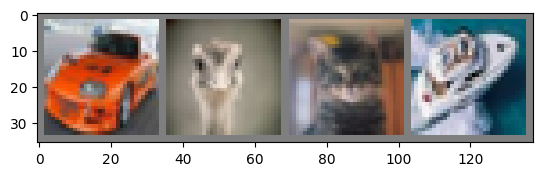

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show imagws
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join('%5s' % classes[labels[j]] for j in range(4)))

In [35]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

- ```net.parameters()``` : collection of all the learning weights in the model - which is what the optimizer agjusts

In [37]:
for epoch in range(2): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs 
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backwoard + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss : %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print("Finished Training")

[1,  2000] loss : 2.254
[1,  4000] loss : 1.952
[1,  6000] loss : 1.693
[1,  8000] loss : 1.598
[1, 10000] loss : 1.552
[1, 12000] loss : 1.497
[2,  2000] loss : 1.416
[2,  4000] loss : 1.403
[2,  6000] loss : 1.368
[2,  8000] loss : 1.358
[2, 10000] loss : 1.329
[2, 12000] loss : 1.300
Finished Training


As a final step, we should check that the model is actually doing general learning, and not simply “memorizing” the dataset. This is called **overfitting**, and usually indicates that the dataset is too small (not enough examples for general learning), or that the model has more learning parameters than it needs to correctly model the dataset.

This is the reason datasets are split into training and test subsets - to test the generality of the model, we ask it to make predictions on data it hasn’t trained on:

In [38]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print("Accuracy of the network on the 10000 test images: %d %%" % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %
